In [2]:
import os
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS
import matplotlib.pyplot as plt
import numpy as np
from main import *

In [12]:
ls ../../Data_Base

13_agosto/     19_agosto/   23_julio_2/    26_mayo_1/  2_julio/   9_julio/
15_setiembre/  23_julio_1/  24_setiembre/  26_mayo_2/  5_agosto/


In [214]:
st=img_set(path="../../Data_Base/26_mayo_1")
pts=st.get_2dcoordinates()

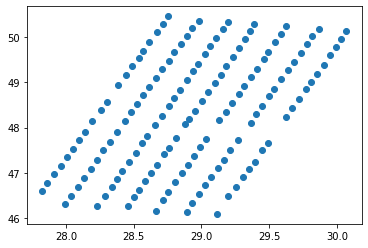

In [215]:
st.get_2dcoordinates().shape
b = st.plot()

In [218]:
meta=getim_meta(st[1][0])
st[1]

(<PIL.MpoImagePlugin.MpoImageFile image mode=RGB size=5472x3648 at 0x7FE687DDA390>,
 'DJI_0422.JPG',
 '../../Data_Base/26_mayo_1/DJI_0422.JPG')

In [146]:
labels=np.vectorize((lambda k:np.array([k,np.array(st.rd[k])])),otypes=[object],signature="()->(i)")(np.array(list(st.rd.keys())))

/home/lambda/paltas/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [23]:
st[0]
#Cambiar el nombre en st[0][2]

(<PIL.MpoImagePlugin.MpoImageFile image mode=RGB size=5472x3648 at 0x7FE7F7958A90>,
 'DJI_0432.JPG',
 '../../Data_Base/26_mayo_1/DJI_0432.JPG')

(array([147.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   2.,   2.,
          0.,   0.,   0.,   6.,   8.,   2.,  16.,  14.,  18.,  22.,  20.,
         24.,  24.,  22.,  22.,  20.,  40.,  24.,  36.,  76.,  58.,  26.,
         20.,   8.,   2.,  10.,   2.,   8.,   4.,   8.,  22.,  36.,  18.,
         36.,  48.,  52.,  40.,  46.,  32.,  40.,  24.,  18.,   4.,   8.,
          6.,   6.,   6.,  10.,   6.,  10.,   8.,   8.,  14.,  10.,  16.,
         18.,  20.,  28.,  16.,  18.,  18.,  22.,  16.,  26.,  16.,  32.,
         38.,  40.,  56.,  40.,  72.,  58.,  96.,  38.,  44.,  48.,  36.,
         62.,  58.,  42.,  52.,  44.,  54.,  46.,  24.,   8.,  10.,  10.,
          6.,  10.,   6.,   2.,  10.,  10.,   8.,  12.,  18.,  14.,  26.,
         24.,  38.,  54.,  54.,  42.,  52.,  64.,  84.,  64.,  56.,  50.,
         34.,  40.,  30.,  24.,  52., 

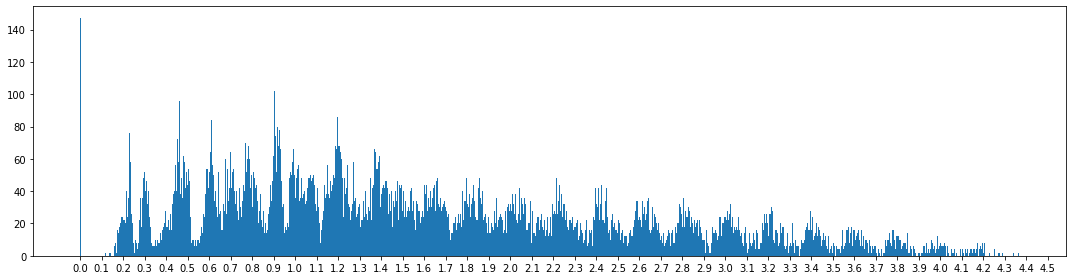

In [198]:
a=np.vectorize((lambda a,b: np.linalg.norm(a-b,axis=1)),signature="(i,j),(l)->(k)")(pts,pts)
#Selección
np.where((a+np.identity(a.shape[0]))<0.15)
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True,figsize=(15,4))
plt.xticks(np.arange(np.min(a), np.max(a)+1, 0.1))
axs.hist(a.reshape(1,-1)[0], bins=1000)

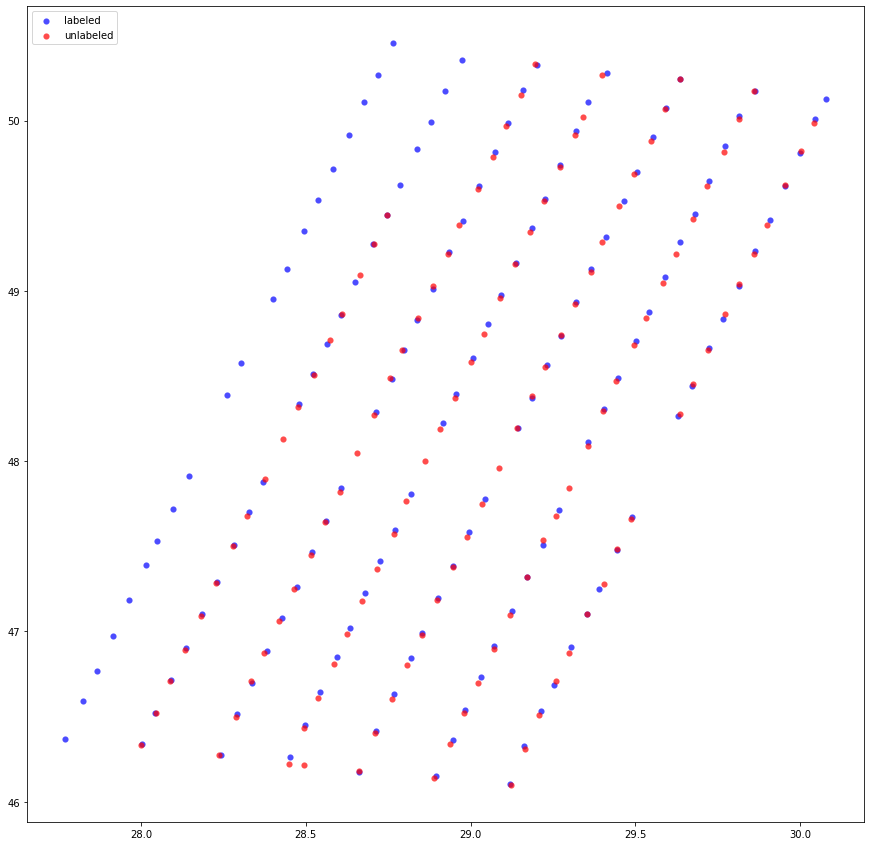

In [201]:
pts
lpts=np.concatenate(labels[:,1]).reshape(-1,2)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
#x1, y1 = lab.to_plot()
#x2, y2 = unlab.to_plot()
ax.scatter(lpts[:,0], lpts[:,1], c = 'b', linewidths=0.1, label = 'labeled',alpha=0.7)
ax.scatter(pts[:,0], pts[:,1], c = 'r', linewidths=0.1, label = 'unlabeled',alpha=0.7)
plt.legend(loc='upper left');
plt.show()

In [207]:
#where in labels are the pts
labels[np.vectorize(lambda l,p:np.argmin(np.linalg.norm(l-p,axis=1)),signature="(i,j),(k)->()")(lpts,pts)]

array([['arbol_8_fila_F', array([29.219 , 47.5082])],
       ['arbol_7_fila_E', array([28.9468, 47.384 ])],
       ['arbol_7_fila_F', array([29.1714, 47.3223])],
       ['arbol_17_fila_D', array([29.2253, 49.5393])],
       ['arbol_10_fila_E', array([29.1431, 48.1946])],
       ['arbol_18_fila_E', array([29.5046, 49.6971])],
       ['arbol_4_fila_B', array([28.1369, 46.9011])],
       ['arbol_3_fila_G', array([29.2136, 46.5316])],
       ['arbol_3_fila_C', array([28.3362, 46.6955])],
       ['arbol_18_fila_F', array([29.7242, 49.6459])],
       ['arbol_21_fila_C', array([29.2002, 50.3258])],
       ['arbol_12_fila_B', array([28.5639, 48.6853])],
       ['arbol_9_fila_G', array([29.4911, 47.6732])],
       ['arbol_6_fila_C', array([28.4718, 47.2609])],
       ['arbol_17_fila_E', array([29.4646, 49.5296])],
       ['arbol_13_fila_D', array([29.0541, 48.8035])],
       ['arbol_2_fila_D', array([28.4968, 46.4519])],
       ['arbol_4_fila_E', array([28.8185, 46.8451])],
       ['arbol_18_fi